Importing Libraries

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import os
import random
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Opening the Data Frame

In [ ]:
new_lfc = pd.read_csv('~/Documents/repos/mtb_tn_db/data/standardized_data/cleaned_ML/lfc_mb_filt.csv')

Function that classifies Gene Based on Category and Outputs the Accuracy of the Classifier

In [54]:
def accuracy_matrix(classname, reg_param_temp, shuffle, model):
    #Creating the y variable. 
    y_list = []
    i = 0
    for gene in new_lfc.Functional_Category:
        if gene == classname:
            y_list.append(1)
        else:
            y_list.append(0)
        i+=1
    y = np.array(y_list)
    
    #Shuffling the y matrix. 
    if shuffle == True:
            random.shuffle(y)
            
    #Creating the x variable.
    raw_x= new_lfc.drop(["Rv_ID", "Functional_Category"], axis = 1)
    X = raw_x.to_numpy()

    #Step 1: Create Logistic REgression Classifier.
    if model == "logreg":
        clf = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C=reg_param_temp, random_state=42)
    elif model == "randomforest":
        clf = XGBClassifier(gamma = reg_param_temp, reg_alpha=1, reg_lambda=1, eval_metric = 'logloss', use_label_encoder=False)
    #Step 2: Split samples into training and test sets using STratifiedKFOld
    n_splits_Temp = 5
    n_classes = 2
    skf = StratifiedKFold(n_splits=n_splits_Temp, shuffle=True, random_state=42)
    confusion = np.zeros((n_classes, n_classes))
    log_loss_var = []
    #Step 3: ITerate thru each training/test set.
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index] 
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
        #Step 4: Fit the logistic regression or random forest to the training data.     
        clf.fit(X_train, y_train)
        #Step 5: Predict the values of the testing data. 
        y_hat = clf.predict(X_test)
        confusion += confusion_matrix(y_test, y_hat)
        #Create a list of all the accuracy matrixes.
        y_pred = clf.predict_proba(X_test)
        log_loss_var.append(log_loss(y_test, y_pred))
    average_logloss = sum(log_loss_var)/len(log_loss_var)

    confusion = normalize(confusion, axis=1, norm='l1')

    col_names = list(clf.classes_)
    df_confusion = pd.DataFrame(confusion, columns=col_names, index=col_names)

    #plt.figure(figsize=(12,12))
    
    #rc = {'xtick.labelsize': 22, 'ytick.labelsize': 22, 'axes.labelsize': 22}
    #sns.set(rc=rc)
    #heat = sns.heatmap(df_confusion, annot=True, linewidths=2, fmt='1.2f', square=True, annot_kws={"fontsize":12})
    #if "/" in classname:
        #classname = classname.split("/")
    #if shuffle == True:
        #filename = str(classname)+","+str(C_temp)+"_shuffle"+".png"
    #elif shuffle == False:
        #filename = str(classname)+","+str(C_temp)+"_real"+".png"
    #plt.savefig(filename)
    return average_logloss


Creating a List of all the Possible Matrices

In [52]:
Fxnal_Categories = list(new_lfc.Functional_Category.unique())
C_values =[0.1]
G_values = [10,100]
Bool = [True, False]

Possible_LogReg_Matrices = []
for Category in Fxnal_Categories:
    for C in C_values:
        for val in Bool:
            Combo =[]
            Combo.extend([Category,C,val,"logreg"])
            Possible_LogReg_Matrices.append(Combo)

Possible_RandomForest_Matrices = []
for Category in Fxnal_Categories:
    for G in G_values:
        for val in Bool:
            Combo =[]
            Combo.extend([Category,G,val,"randomforest"])
            Possible_RandomForest_Matrices.append(Combo)

Possible_LogReg_Matrices
Possible_RandomForest_Matrices 

[['information pathways', 10, True, 'randomforest'],
 ['information pathways', 10, False, 'randomforest'],
 ['information pathways', 100, True, 'randomforest'],
 ['information pathways', 100, False, 'randomforest'],
 ['cell wall and cell processes', 10, True, 'randomforest'],
 ['cell wall and cell processes', 10, False, 'randomforest'],
 ['cell wall and cell processes', 100, True, 'randomforest'],
 ['cell wall and cell processes', 100, False, 'randomforest'],
 ['intermediary metabolism and respiration', 10, True, 'randomforest'],
 ['intermediary metabolism and respiration', 10, False, 'randomforest'],
 ['intermediary metabolism and respiration', 100, True, 'randomforest'],
 ['intermediary metabolism and respiration', 100, False, 'randomforest'],
 ['regulatory proteins', 10, True, 'randomforest'],
 ['regulatory proteins', 10, False, 'randomforest'],
 ['regulatory proteins', 100, True, 'randomforest'],
 ['regulatory proteins', 100, False, 'randomforest'],
 ['virulence, detoxification, ad

Running Through Each R Matrix and Saving the Log Loss

In [ ]:
ReallogLoss = []
Shufflelogloss = []

for matrix in Possible_RandomForest_Matrices:
    average_logloss = accuracy_matrix(matrix[0], matrix[1], matrix[2],matrix[3])
    if matrix[2] == False:
        ReallogLoss.append(average_logloss)
        print(matrix)
    elif matrix[2] == True:
        Shufflelogloss.append(average_logloss)
        print(matrix)

['information pathways', 10, True, 'randomforest']
['information pathways', 10, False, 'randomforest']
['information pathways', 100, True, 'randomforest']
['information pathways', 100, False, 'randomforest']
['cell wall and cell processes', 10, True, 'randomforest']
['cell wall and cell processes', 10, False, 'randomforest']
['cell wall and cell processes', 100, True, 'randomforest']
['cell wall and cell processes', 100, False, 'randomforest']
['intermediary metabolism and respiration', 10, True, 'randomforest']
['intermediary metabolism and respiration', 10, False, 'randomforest']
['intermediary metabolism and respiration', 100, True, 'randomforest']
['intermediary metabolism and respiration', 100, False, 'randomforest']
['regulatory proteins', 10, True, 'randomforest']
['regulatory proteins', 10, False, 'randomforest']
['regulatory proteins', 100, True, 'randomforest']
['regulatory proteins', 100, False, 'randomforest']


Running all the Logisitic Regression

In [42]:
LogReg_Shufflelogloss = []
LogReg_ReallogLoss = []

for matrix in Possible_LogReg_Matrices:
    average_logloss = accuracy_matrix(matrix[0], matrix[1], matrix[2],matrix[3])
    if matrix[2] == False:
        LogReg_ReallogLoss.append(average_logloss)
        print(matrix)
    elif matrix[2] == True:
        LogReg_Shufflelogloss.append(average_logloss)
        print(matrix)

['information pathways', 0.1, True, 'logreg']
['information pathways', 0.1, False, 'logreg']
['cell wall and cell processes', 0.1, True, 'logreg']
['cell wall and cell processes', 0.1, False, 'logreg']
['intermediary metabolism and respiration', 0.1, True, 'logreg']
['intermediary metabolism and respiration', 0.1, False, 'logreg']
['regulatory proteins', 0.1, True, 'logreg']
['regulatory proteins', 0.1, False, 'logreg']
['virulence, detoxification, adaptation', 0.1, True, 'logreg']
['virulence, detoxification, adaptation', 0.1, False, 'logreg']
['insertion seqs and phages', 0.1, True, 'logreg']
['insertion seqs and phages', 0.1, False, 'logreg']
['lipid metabolism', 0.1, True, 'logreg']
['lipid metabolism', 0.1, False, 'logreg']
['PE/PPE', 0.1, True, 'logreg']
['PE/PPE', 0.1, False, 'logreg']


Creating a Data Frame of LogLoss Values for each C 

In [47]:
Categories = []
LogReg_Categories = []
Gamma_parameters = []
for matrix in Possible_RandomForest_Matrices:
    if matrix[2] == True:
        Categories.append(matrix[0])
        Gamma_parameters.append(matrix[1])
for matrix in Possible_LogReg_Matrices:
    if matrix[2] == True:
        LogReg_Categories.append(matrix[0])
data= {'Gamma':Gamma_parameters,'Real_Data':ReallogLoss, 'Shuffle_Data':Shufflelogloss} #Creating a data frame with all the C values.
logregdata = {'Real_Data':LogReg_ReallogLoss, 'Shuffle_Data':LogReg_Shufflelogloss}
df_LogRegLogLoss = pd.DataFrame(logregdata,index = [LogReg_Categories])
df_LogLoss = pd.DataFrame(data,index = [Categories])
#Making a dataframe for each gamma parameter.
df_LogLoss = pd.DataFrame(data,index = [Categories])
df_G10 = df_LogLoss[df_LogLoss.Gamma == 10]
df_G100 = df_LogLoss[df_LogLoss.Gamma == 100]
df_LogLoss
df_LogRegLogLoss

,Real_Data,Shuffle_Data
information pathways,0.615340,0.693168
cell wall and cell processes,0.683947,0.708362
intermediary metabolism and respiration,0.680178,0.711961
regulatory proteins,0.648278,0.691758
"virulence, detoxification, adaptation",0.645794,0.683093
insertion seqs and phages,0.424426,0.633530
lipid metabolism,0.670037,0.681901
PE/PPE,0.495685,0.664824


In [53]:
df_LogLoss

,Gamma,Real_Data,Shuffle_Data
information pathways,10,0.358120,0.408789
information pathways,100,0.540802,0.630629
cell wall and cell processes,10,0.644577,0.675921
cell wall and cell processes,100,0.692630,0.693147
intermediary metabolism and respiration,10,0.668406,0.708941
intermediary metabolism and respiration,100,0.691750,0.693147
regulatory proteins,10,0.343125,0.359365
regulatory proteins,100,0.588883,0.605164
"virulence, detoxification, adaptation",10,0.353664,0.372889
"virulence, detoxification, adaptation",100,0.598517,0.624659


In [51]:
df_G100

,Gamma,Real_Data,Shuffle_Data
information pathways,100,0.540802,0.630629
cell wall and cell processes,100,0.692630,0.693147
intermediary metabolism and respiration,100,0.691750,0.693147
regulatory proteins,100,0.588883,0.605164
"virulence, detoxification, adaptation",100,0.598517,0.624659
insertion seqs and phages,100,0.346506,0.538834
lipid metabolism,100,0.591495,0.650497
PE/PPE,100,0.341068,0.560318


Creating a Scatterplot with Real and Shuffled Data

In [38]:
def scatterlog_loss(df):
    plt.figure(figsize = (6,6))
    plt.scatter(df.Real_Data, df.Shuffle_Data)
    plt.xlim(0.3,0.8)
    plt.ylim(0.3,0.8)
    xyline = np.linspace(0.3,0.8,20)
    plt.plot(xyline, xyline)
    plt.xlabel('logloss real data', fontsize = 22)
    plt.ylabel('logloss shuffled data', fontsize = 22)
    xt = plt.xticks(fontsize = 14)
    yt = plt.yticks(fontsize = 14)
    #plt.errorbar(df.Real_Data, df.Shuffle_Data, yerr= df.Error, fmt='o')

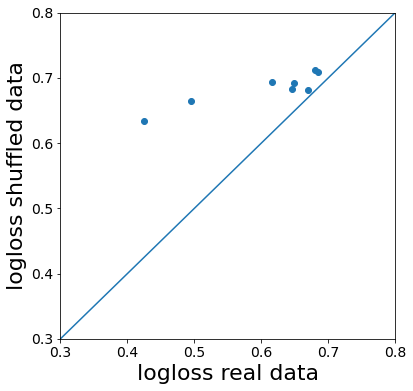

In [48]:
scatterlog_loss(df_LogRegLogLoss)

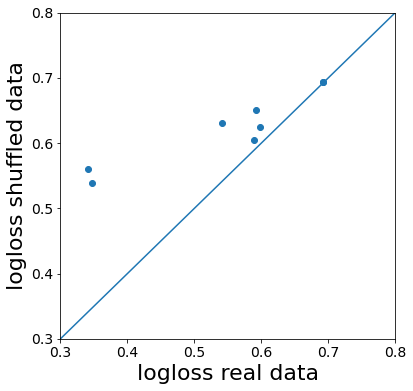

In [40]:
scatterlog_loss(df_G100)

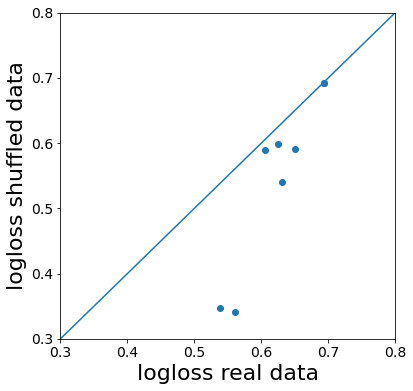

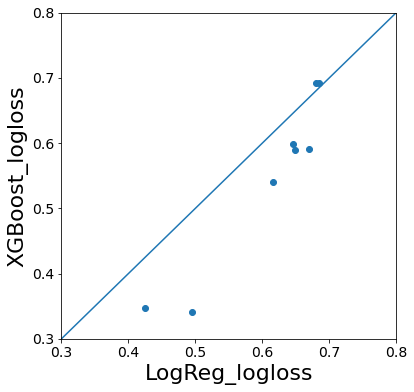

In [50]:
plt.figure(figsize = (6,6))
plt.scatter(df_LogRegLogLoss.Real_Data, df_G100.Real_Data)
plt.xlim(0.3,0.8)
plt.ylim(0.3,0.8)
xyline = np.linspace(0.3,0.8,20)
plt.plot(xyline, xyline)
plt.xlabel('LogReg_logloss', fontsize = 22)
plt.ylabel('XGBoost_logloss', fontsize = 22)
xt = plt.xticks(fontsize = 14)
yt = plt.yticks(fontsize = 14)
#plt.errorbar(df.Real_Data, df.Shuffle_Data, yerr= df.Error, fmt='o')